# Some important factors on PISA Scores_ Part2

## Investigation Overview¶
In this investigation, I wanted to look at the important factors to influeance student's skill and knowledge. My main focus is on the relationship with Wealth, father's and mother's education, learning minutes and students country.

## Dataset Overview
The data consisted of math / reading / science scores and attributes of approximately 485,500 students. The attributes included Wealth, parents' education, learning minutes and students country.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df_original = pd.read_csv('pisa2012.csv', encoding="cp1252")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df1 = df_original[['CNT','SUBNATIO','STRATUM','OECD','SCHOOLID','ST01Q01','ST02Q01','ST03Q02','ST04Q01','ST13Q01','ST15Q01','ST17Q01','ST19Q01','ST20Q01','ST28Q01','IC01Q04','IC02Q04','AGE','LMINS','MMINS','SMINS','TIMEINT','WEALTH','PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH','PV1READ','PV2READ','PV3READ','PV4READ','PV5READ','PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE']]
df = df1.rename(columns={'CNT': 'Country', 'ST04Q01': 'Gender', 'ST13Q01':'Mother_school', 'ST17Q01': 'Father_school'})



In [5]:
df['Math'] = (df['PV1MATH'] + df['PV2MATH'] +df['PV3MATH'] +df['PV4MATH'] +df['PV5MATH']) / 5
df['Reading'] = (df['PV1READ'] + df['PV2READ'] +df['PV3READ'] +df['PV4READ'] +df['PV5READ']) / 5
df['Science'] = (df['PV1SCIE'] + df['PV2SCIE'] +df['PV3SCIE'] +df['PV4SCIE'] +df['PV5SCIE']) / 5

In [44]:
df['Mother_school'] = df.Mother_school.str.replace('ISCED level 3A', 'University')
df['Mother_school'] = df.Mother_school.str.replace('ISCED level 3B, 3C', 'High_sch')
df['Mother_school'] = df.Mother_school.str.replace('ISCED level 2', 'Junior_High_sch')
df['Mother_school'] = df.Mother_school.str.replace('ISCED level 1', 'Elementary_sch')

In [45]:
df['Father_school'] = df.Father_school.str.replace('ISCED level 3A', 'University')
df['Father_school'] = df.Father_school.str.replace('ISCED level 3B, 3C', 'High_sch')
df['Father_school'] = df.Father_school.str.replace('ISCED level 2', 'Junior_High_sch')
df['Father_school'] = df.Father_school.str.replace('ISCED level 1', 'Elementary_sch')

## Distribution of Scores
Pisa math, reading, science scores in the dataset take on a very large range of values, from about 100 at the lowest to 800 at the highest. There is no differenct among subjects(math, reading and science) in terms of distribution shapes.

Text(0.5, 0, 'Science Score')

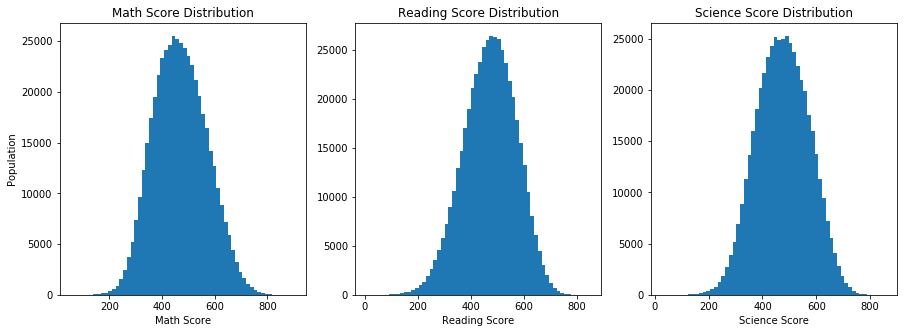

In [8]:
plt.figure(figsize = [15, 5])
plt.subplot(1, 3, 1)
plt.hist(data=df, x= 'Math', bins = 60)
plt.title('Math Score Distribution')
plt.xlabel('Math Score')
plt.ylabel('Population')

plt.subplot(1, 3, 2)
plt.hist(data=df, x= 'Reading', bins = 60)
plt.title('Reading Score Distribution')
plt.xlabel('Reading Score')

plt.subplot(1, 3, 3)
plt.hist(data=df, x= 'Science', bins = 60)
plt.title('Science Score Distribution')
plt.xlabel('Science Score')

## Distribution of Wealth
Wealth index distribution is skewed left taking on a range from about -6 to 3. 

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Population')

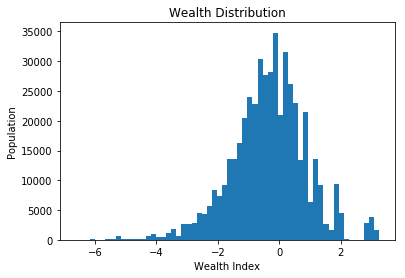

In [9]:
plt.hist(data=df, x= 'WEALTH', bins = 60)
plt.title('Wealth Distribution')
plt.xlabel('Wealth Index')
plt.ylabel('Population')

## Relationship among Each Subject Scores
Plotting math vs reading, reading vs science, science vs math scores produces an approximately linear relationships.

Text(0, 0.5, 'Math Score')

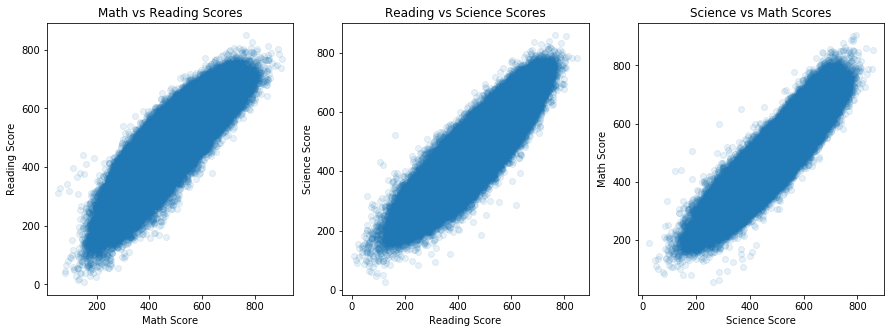

In [10]:
plt.figure(figsize = [15, 5])
plt.subplot(1, 3, 1)
plt.scatter(data=df, x='Math', y='Reading', alpha = 0.1)
plt.title('Math vs Reading Scores')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')

plt.subplot(1, 3, 2)
plt.scatter(data=df, x='Reading', y='Science', alpha = 0.1)
plt.title('Reading vs Science Scores')
plt.xlabel('Reading Score')
plt.ylabel('Science Score')

plt.subplot(1, 3, 3)
plt.scatter(data=df, x='Science', y='Math', alpha = 0.1)
plt.title('Science vs Math Scores')
plt.xlabel('Science Score')
plt.ylabel('Math Score')

## Parents' Education and Student's Score
There is a clear tendency that if parent's (whichever mother or father) educational level is higher, student's score (whichever math, reading or science) gets higher. Moreover, if parent's educational level is high, distribution of score tend to be wider. 

In [46]:
group_means = df.groupby(['Mother_school']).mean()
group_order_m = group_means.sort_values(['Math'], ascending = False).index
group_order_r = group_means.sort_values(['Reading'], ascending = False).index
group_order_s = group_means.sort_values(['Science'], ascending = False).index
group_means_f = df.groupby(['Father_school']).mean()
group_order_fm = group_means_f.sort_values(['Math'], ascending = False).index
group_order_fr = group_means_f.sort_values(['Reading'], ascending = False).index
group_order_fs = group_means_f.sort_values(['Science'], ascending = False).index

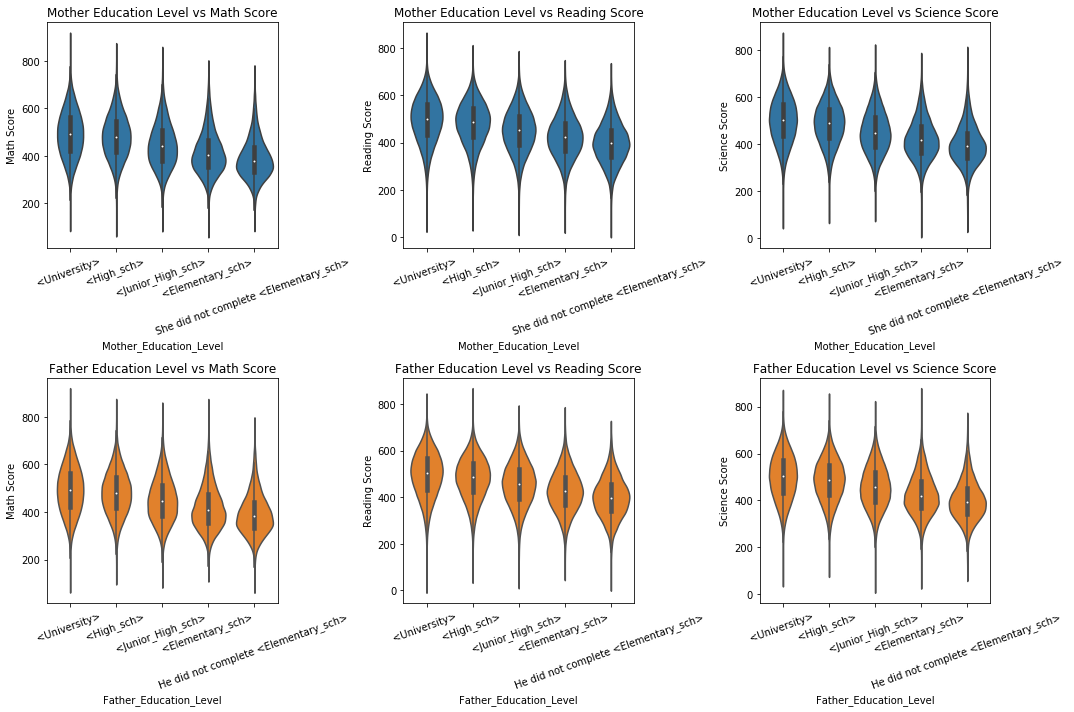

In [47]:
plt.figure(figsize = [15, 10])
plt.subplot(2, 3, 1)
ax = sb.violinplot(data=df, x= 'Mother_school', y='Math', color=sb.color_palette()[0], order = group_order_m)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20)
plt.title('Mother Education Level vs Math Score')
plt.ylabel('Math Score')
plt.xlabel('Mother_Education_Level')

plt.subplot(2, 3, 2)
ax = sb.violinplot(data=df, x= 'Mother_school', y='Reading', color=sb.color_palette()[0], order = group_order_r)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20)
plt.title('Mother Education Level vs Reading Score')
plt.ylabel('Reading Score')
plt.xlabel('Mother_Education_Level')

plt.subplot(2, 3, 3)
ax = sb.violinplot(data=df, x= 'Mother_school', y='Science', color=sb.color_palette()[0], order = group_order_s)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20)
plt.title('Mother Education Level vs Science Score')
plt.ylabel('Science Score')
plt.xlabel('Mother_Education_Level')

plt.subplot(2, 3, 4)
ax = sb.violinplot(data=df, x= 'Father_school', y='Math', color=sb.color_palette()[1], order = group_order_fm)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20)
plt.title('Father Education Level vs Math Score')
plt.ylabel('Math Score')
plt.xlabel('Father_Education_Level')

plt.subplot(2, 3, 5)
ax = sb.violinplot(data=df, x= 'Father_school', y='Reading', color=sb.color_palette()[1], order = group_order_fr)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20)
plt.title('Father Education Level vs Reading Score')
plt.ylabel('Reading Score')
plt.xlabel('Father_Education_Level')

plt.subplot(2, 3, 6)
ax = sb.violinplot(data=df, x= 'Father_school', y='Science', color=sb.color_palette()[1], order = group_order_fs)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20)
plt.title('Father Education Level vs Science Score')
plt.ylabel('Science Score')
plt.xlabel('Father_Education_Level')

plt.tight_layout() 

## Wealth vs Average Score by Country (All Regions)
There is not clear lenior relationships between Wealth index and avergae score by country in all subjects. However, we can see some tendancy if we focus by country regions, such as 'Asia', 'North America', 'Oceania', 'Europe', 'Middle East', 'Latin America' and 'Africa'.

In [48]:
CNT_CAT = [['Albania','Europe'], ['United Arab Emirates','Middle East'], ['Argentina','Latin America'], ['Australia','Oceania'],
       ['Austria','Europe'], ['Belgium','Europe'], ['Bulgaria','Europe'], ['Brazil','Latin America'], ['Canada','North America'],
       ['Switzerland','Europe'], ['Chile','Latin America'], ['Colombia','Latin America'], ['Costa Rica','Latin America'], ['Czech Republic','Europe'],
       ['Germany','Europe'], ['Denmark','Europe'], ['Spain','Europe'], ['Estonia','Europe'], ['Finland','Europe'], ['France','Europe'],
       ['United Kingdom','Europe'], ['Greece','Europe'], ['Hong Kong-China','Asia'], ['Croatia','Europe'],
       ['Hungary','Europe'], ['Indonesia','Asia'], ['Ireland','Europe'], ['Iceland','Europe'], ['Israel','Middle East'], ['Italy','Europe'],
       ['Jordan','Middle East'], ['Japan','Asia'], ['Kazakhstan','Asia'], ['Korea','Asia'], ['Liechtenstein','Europe'],
       ['Lithuania','Europe'], ['Luxembourg','Europe'], ['Latvia','Europe'], ['Macao-China','Asia'], ['Mexico','Latin America'],
       ['Montenegro','Europe'], ['Malaysia','Asia'], ['Netherlands','Europe'], ['Norway','Europe'], ['New Zealand','Oceania'],
       ['Peru','Latin America'], ['Poland','Europe'], ['Portugal','Europe'], ['Qatar','Middle East'], ['China-Shanghai','Asia'],
       ['Perm(Russian Federation)','Europe'], ['Florida (USA)','North America'], ['Connecticut (USA)','North America'],
       ['Massachusetts (USA)','North America'], ['Romania','Europe'], ['Russian Federation','Europe'],
       ['Singapore','Asia'], ['Serbia','Europe'], ['Slovak Republic','Europe'], ['Slovenia','Europe'], ['Sweden','Europe'],
       ['Chinese Taipei','Asia'], ['Thailand','Asia'], ['Tunisia','Africa'], ['Turkey','Asia'], ['Uruguay','Latin America'],
       ['United States of America','North America'], ['Vietnam','Asia']]

In [51]:
group_means = df.groupby(['Country']).mean()
df_CNTCAT = pd.DataFrame(CNT_CAT)
df_CNTCAT = df_CNTCAT.rename(columns={0: 'Country', 1: 'Region'})
df = pd.merge(df, df_CNTCAT, on='Country')
group_means = pd.merge(group_means, df_CNTCAT, on='Country')

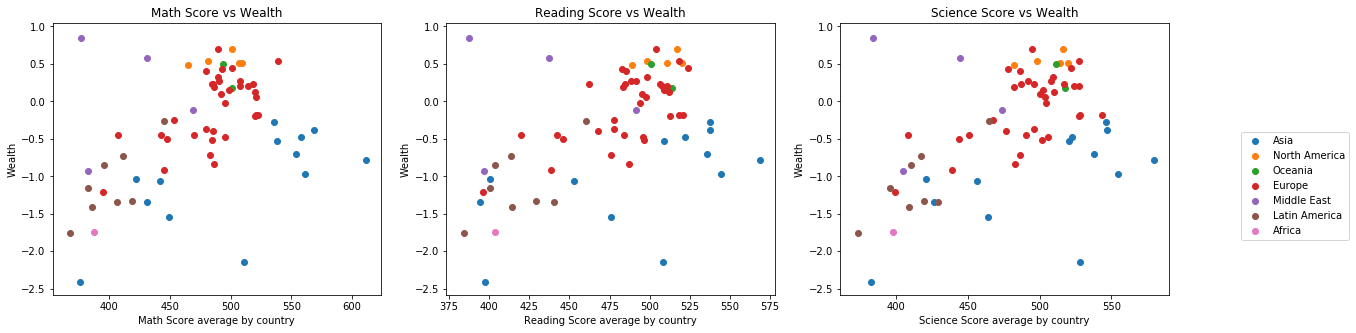

In [52]:
listre = ['Asia', 'North America', 'Oceania', 'Europe', 'Middle East', 'Latin America', 'Africa']

plt.figure(figsize = [20, 5])
plt.subplot(1, 3, 1)

for i in listre:
    plt.scatter(data=group_means[group_means['Region']==i], x='Math', y='WEALTH', label = i)
plt.title('Math Score vs Wealth')
plt.xlabel('Math Score average by country')
plt.ylabel('Wealth')

plt.subplot(1, 3, 2)
for i in listre:
    plt.scatter(data=group_means[group_means['Region']==i], x='Reading', y='WEALTH', label = i)
plt.title('Reading Score vs Wealth')
plt.xlabel('Reading Score average by country')
plt.ylabel('Wealth')

plt.subplot(1, 3, 3)
for i in listre:
    plt.scatter(data=group_means[group_means['Region']==i], x='Science', y='WEALTH', label = i)
plt.title('Science Score vs Wealth')
plt.xlabel('Science Score average by country')
plt.ylabel('Wealth')
plt.legend(loc='upper right',
           bbox_to_anchor=(1.05, 0.5, 0.5, .100), 
           borderaxespad=0.,)

## Wealth vs Average Score by Country (Europe and North America)
We can see moderate lenior relationships between Wealth index and avergae score by country in all subjects, if we pick up only the countries in Europe and North America.

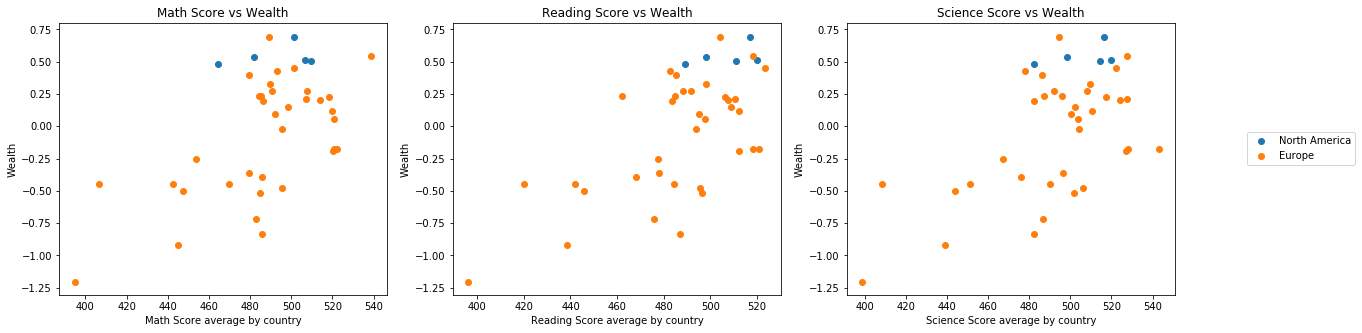

In [53]:
listre = ['North America','Europe']

plt.figure(figsize = [20, 5])
plt.subplot(1, 3, 1)

for i in listre:
    plt.scatter(data=group_means[group_means['Region']==i], x='Math', y='WEALTH', label = i)
plt.title('Math Score vs Wealth')
plt.xlabel('Math Score average by country')
plt.ylabel('Wealth')

plt.subplot(1, 3, 2)
for i in listre:
    plt.scatter(data=group_means[group_means['Region']==i], x='Reading', y='WEALTH', label = i)
plt.title('Reading Score vs Wealth')
plt.xlabel('Reading Score average by country')
plt.ylabel('Wealth')

plt.subplot(1, 3, 3)
for i in listre:
    plt.scatter(data=group_means[group_means['Region']==i], x='Science', y='WEALTH', label = i)
plt.title('Science Score vs Wealth')
plt.xlabel('Science Score average by country')
plt.ylabel('Wealth')
plt.legend(loc='upper right',
           bbox_to_anchor=(1.05, 0.5, 0.5, .100), 
           borderaxespad=0.,)

## Average Scores by Wealth and Learning Minutes
We can see wealth and learning minutes are moderately affecting to each scores by ploting 2d histgram of the scores by Wealth and learning minutes.

In [54]:
df_2 = df.dropna()

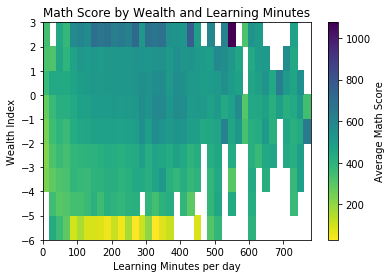

In [58]:
xbin_edges = np.arange(0, 800, 20)
ybin_edges = np.arange(-6, df_2['WEALTH'].max()+0.5, 1)

xbin_idxs = pd.cut(df_2['MMINS'], xbin_edges, right = False,
                    include_lowest = True, labels = False).fillna(0).astype(int)
ybin_idxs = pd.cut(df_2['WEALTH'], ybin_edges, right = False,
                    include_lowest = True, labels = False).fillna(0).astype(int)

pts_per_bin = df_2.groupby([xbin_idxs, ybin_idxs]).size()
pts_per_bin = pts_per_bin.reset_index()
pts_per_bin = pts_per_bin.pivot(index = 'MMINS', columns = 'WEALTH').values

z_wts = df_2['Math'] / pts_per_bin[xbin_idxs, ybin_idxs]

plt.hist2d(data = df_2, x = 'MMINS', y = 'WEALTH', cmap = 'viridis_r', weights = z_wts,
           bins = [xbin_edges, ybin_edges], cmin = 0.5);
plt.title('Math Score by Wealth and Learning Minutes')
plt.xlabel('Learning Minutes per Day')
plt.ylabel('Wealth Index');
plt.colorbar(label = 'Average Math Score');

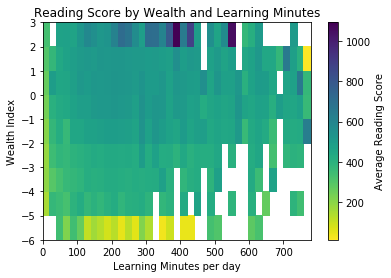

In [56]:
xbin_edges = np.arange(0, 800, 20)
ybin_edges = np.arange(-6, df_2['WEALTH'].max()+0.5, 1)

xbin_idxs = pd.cut(df_2['LMINS'], xbin_edges, right = False,
                    include_lowest = True, labels = False).fillna(0).astype(int)
ybin_idxs = pd.cut(df_2['WEALTH'], ybin_edges, right = False,
                    include_lowest = True, labels = False).fillna(0).astype(int)

pts_per_bin = df_2.groupby([xbin_idxs, ybin_idxs]).size()
pts_per_bin = pts_per_bin.reset_index()
pts_per_bin = pts_per_bin.pivot(index = 'LMINS', columns = 'WEALTH').values

z_wts = df_2['Reading'] / pts_per_bin[xbin_idxs, ybin_idxs]

plt.hist2d(data = df_2, x = 'LMINS', y = 'WEALTH', cmap = 'viridis_r', weights = z_wts,
           bins = [xbin_edges, ybin_edges], cmin = 0.5);
plt.title('Reading Score by Wealth and Learning Minutes')
plt.xlabel('Learning Minutes per Day')
plt.ylabel('Wealth Index');
plt.colorbar(label = 'Average Reading Score');

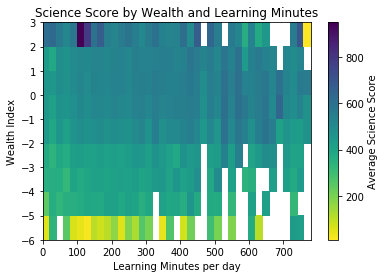

In [57]:
xbin_edges = np.arange(0, 800, 20)
ybin_edges = np.arange(-6, df_2['WEALTH'].max()+0.5, 1)

xbin_idxs = pd.cut(df_2['SMINS'], xbin_edges, right = False,
                    include_lowest = True, labels = False).fillna(0).astype(int)
ybin_idxs = pd.cut(df_2['WEALTH'], ybin_edges, right = False,
                    include_lowest = True, labels = False).fillna(0).astype(int)

pts_per_bin = df_2.groupby([xbin_idxs, ybin_idxs]).size()
pts_per_bin = pts_per_bin.reset_index()
pts_per_bin = pts_per_bin.pivot(index = 'SMINS', columns = 'WEALTH').values

z_wts = df_2['Science'] / pts_per_bin[xbin_idxs, ybin_idxs]

plt.hist2d(data = df_2, x = 'SMINS', y = 'WEALTH', cmap = 'viridis_r', weights = z_wts,
           bins = [xbin_edges, ybin_edges], cmin = 0.5);
plt.title('Science Score by Wealth and Learning Minutes')
plt.xlabel('Learning Minutes per Day')
plt.ylabel('Wealth Index');
plt.colorbar(label = 'Average Science Score');